<Figure size 1200x600 with 0 Axes>

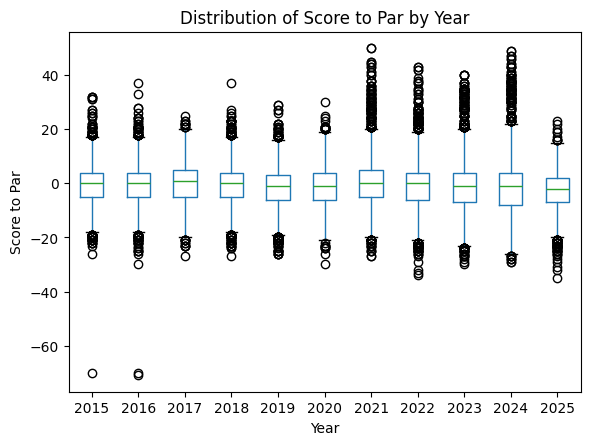

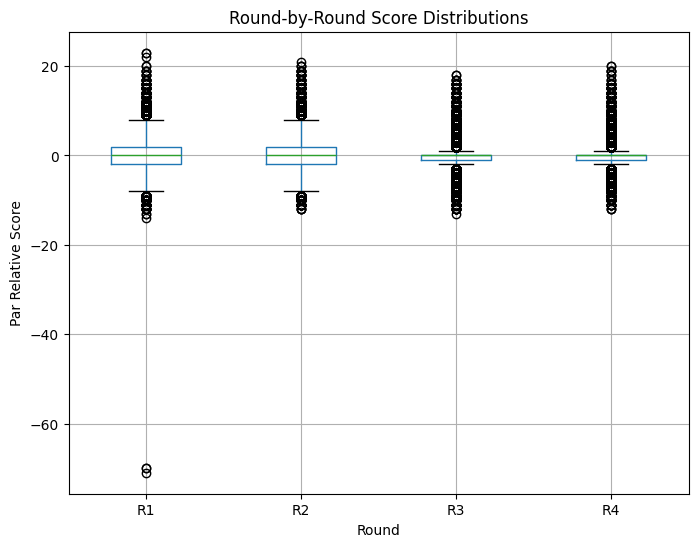

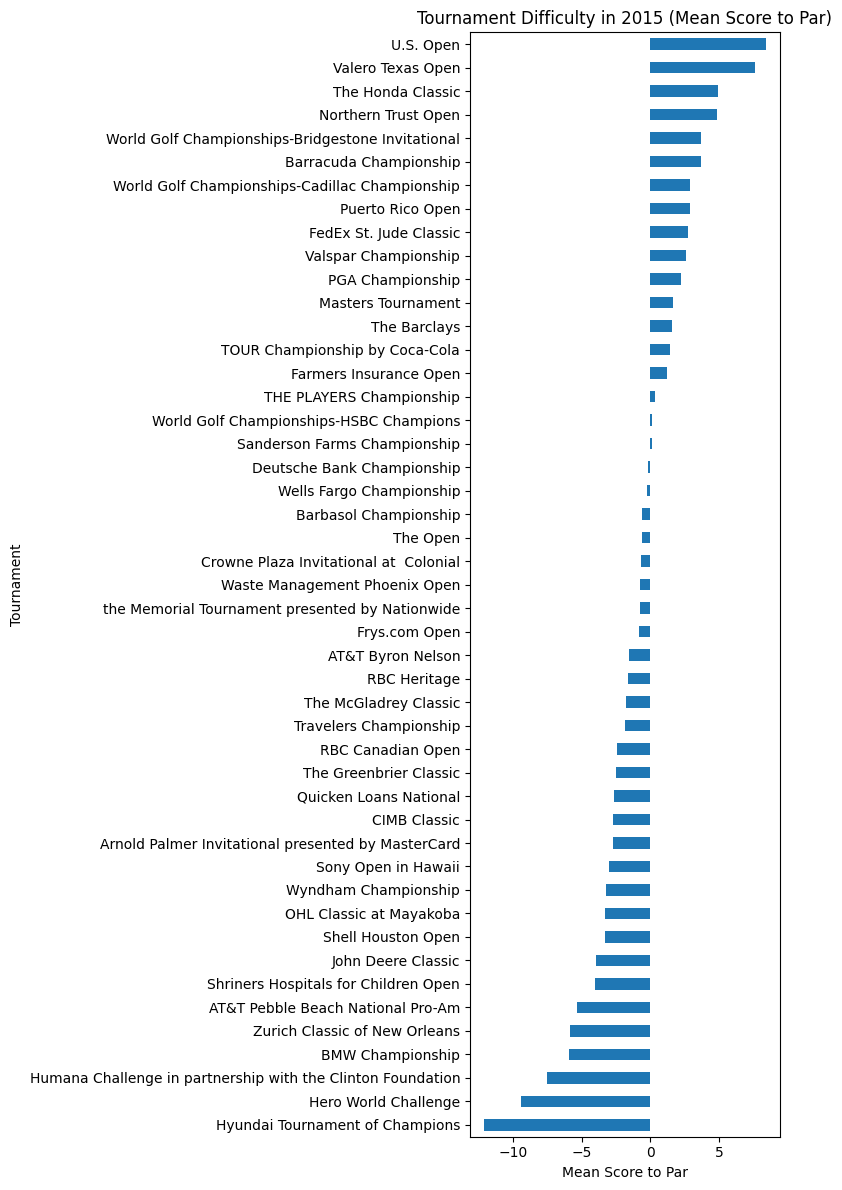

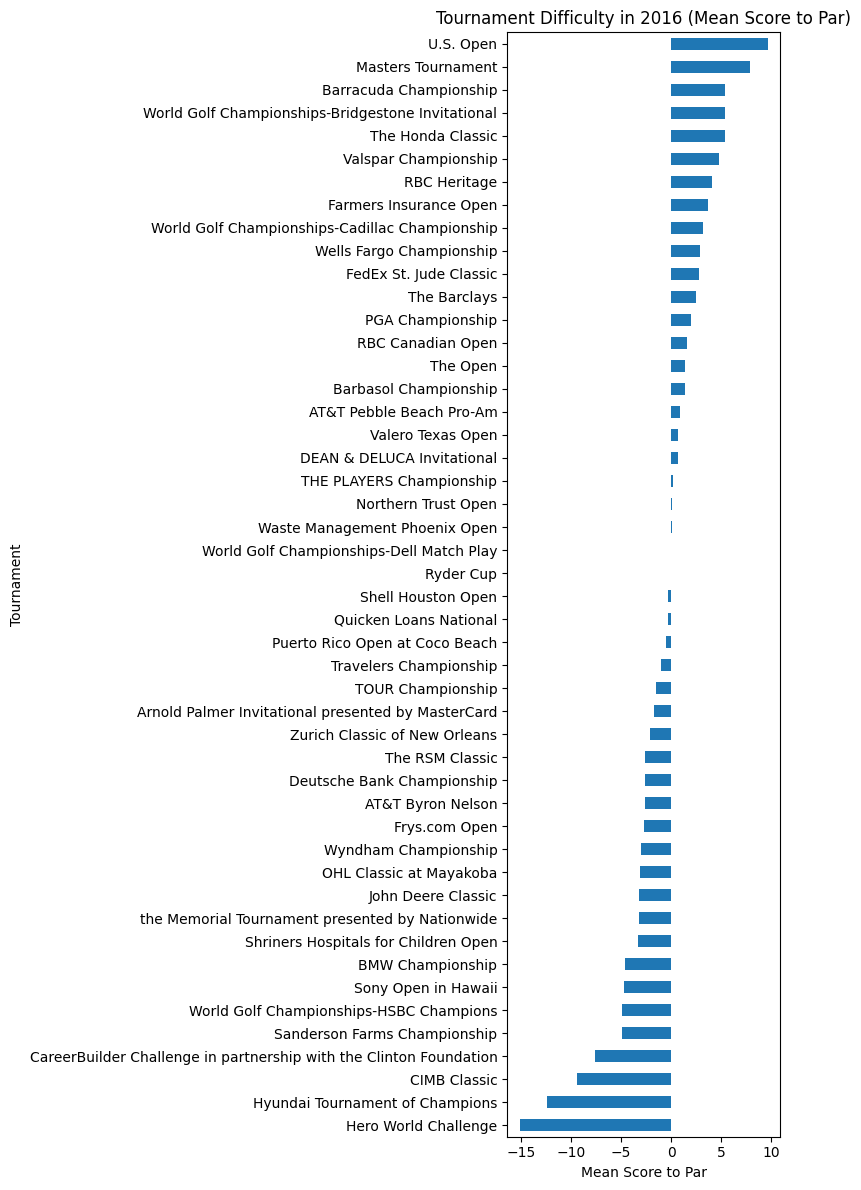

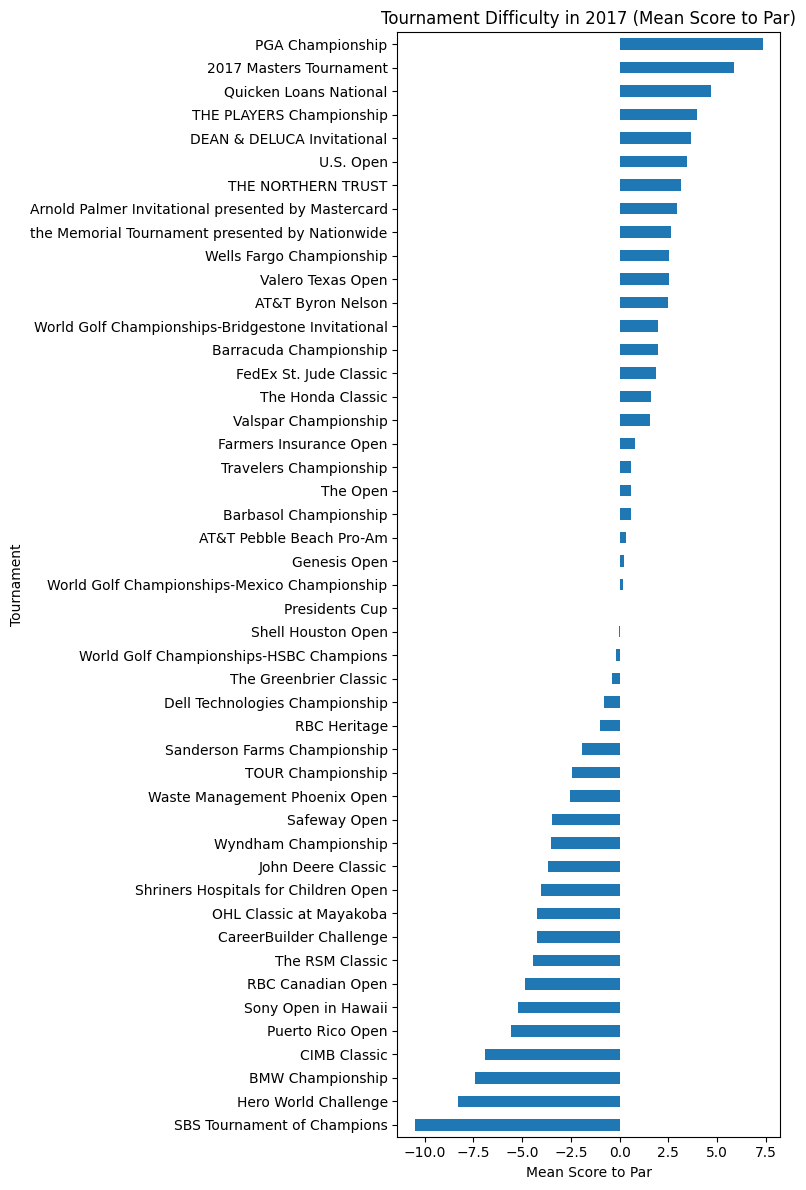

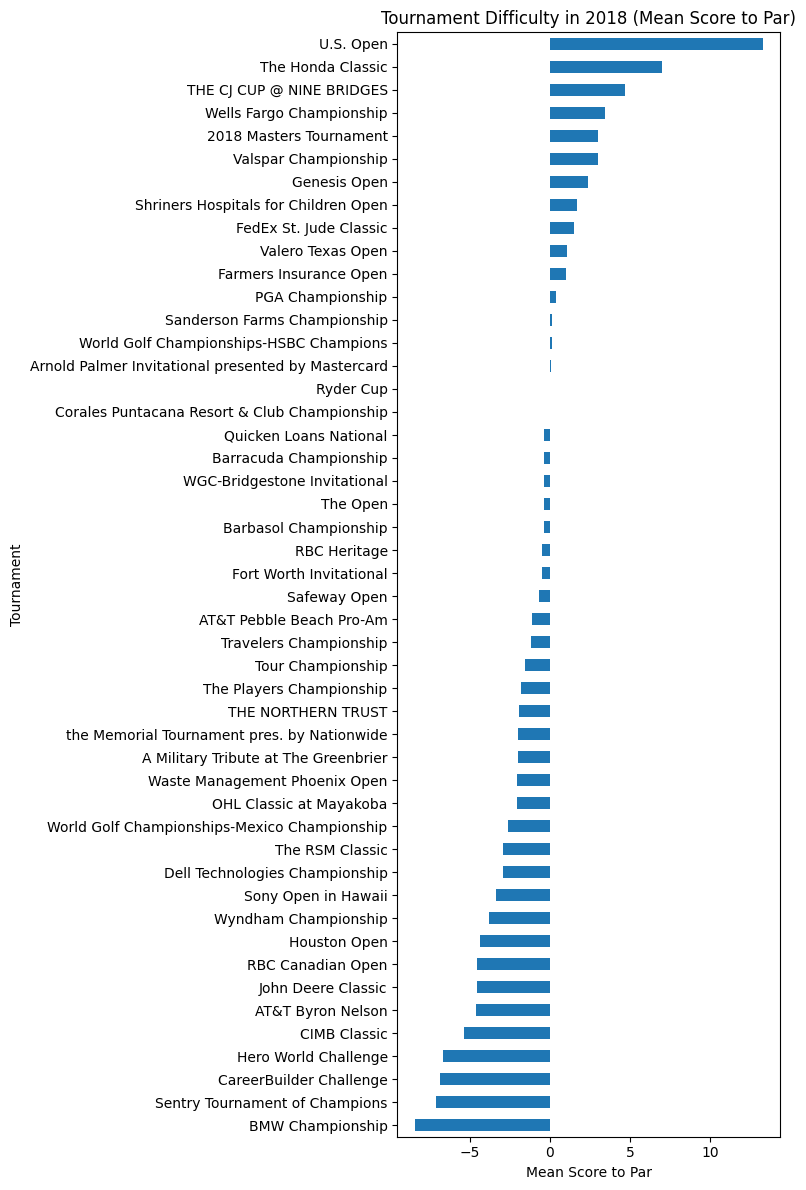

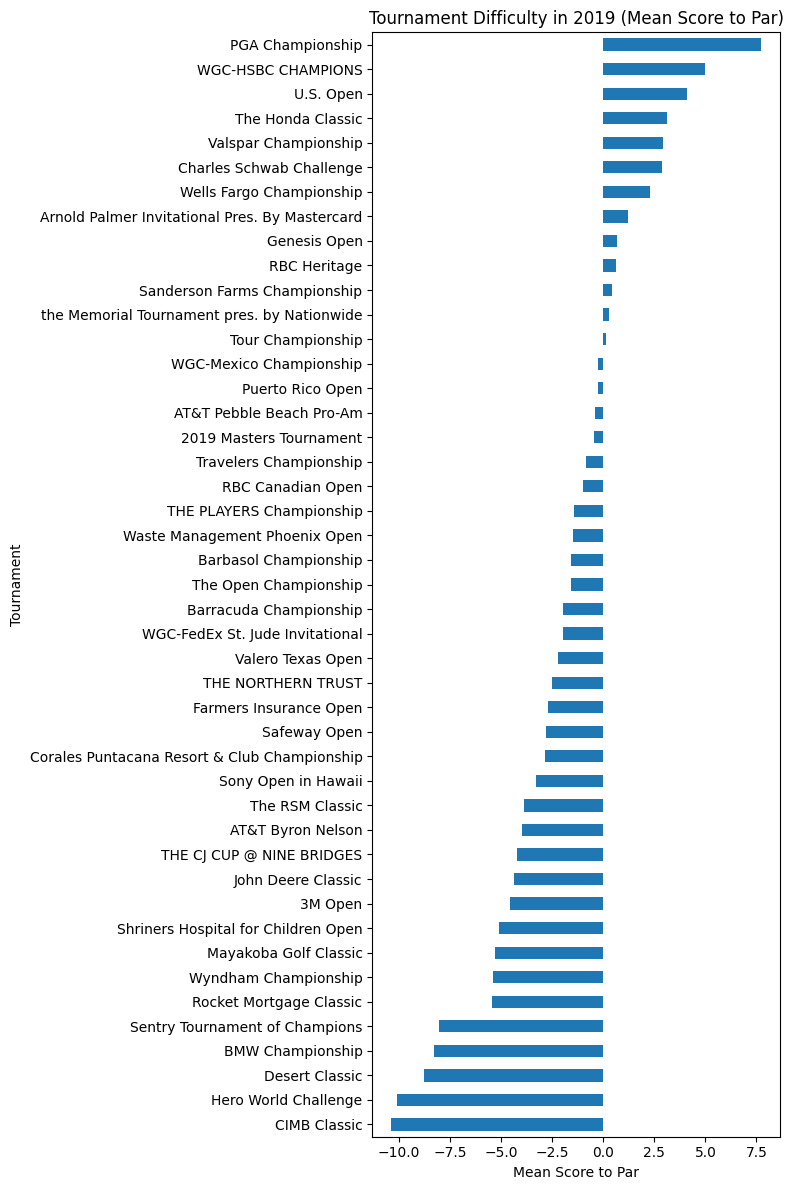

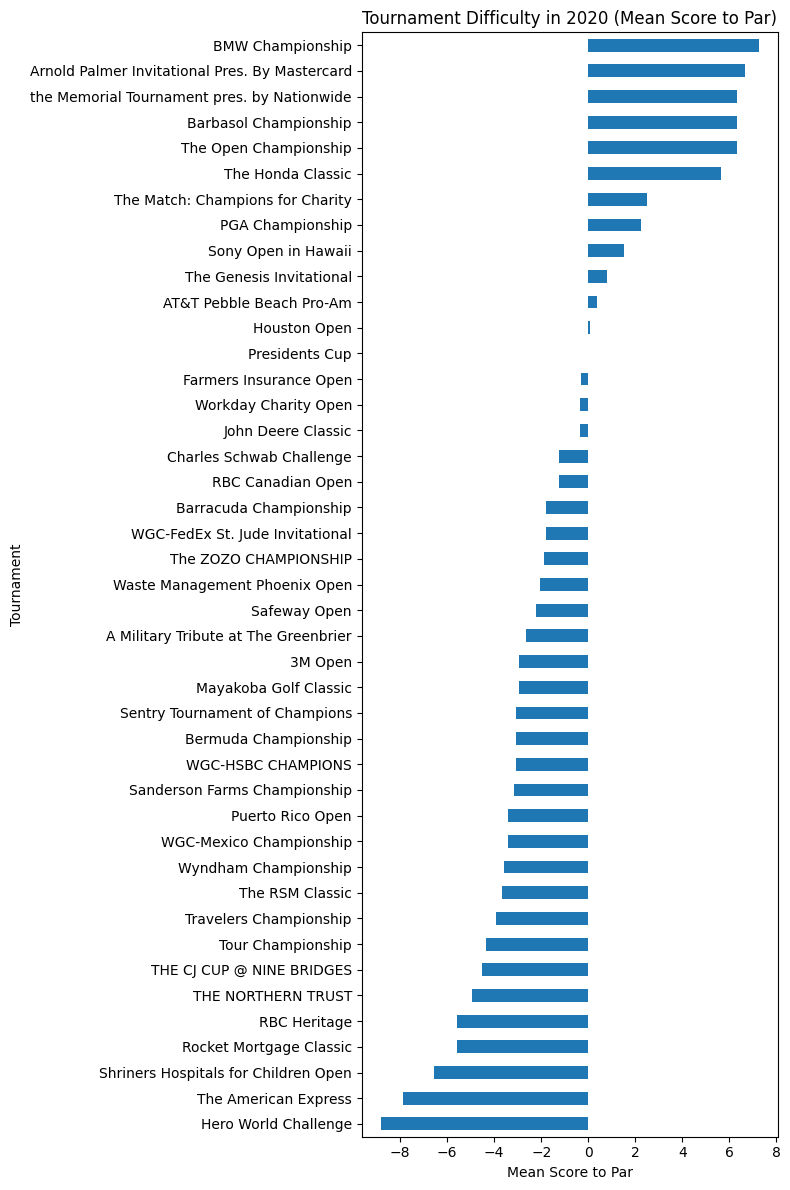

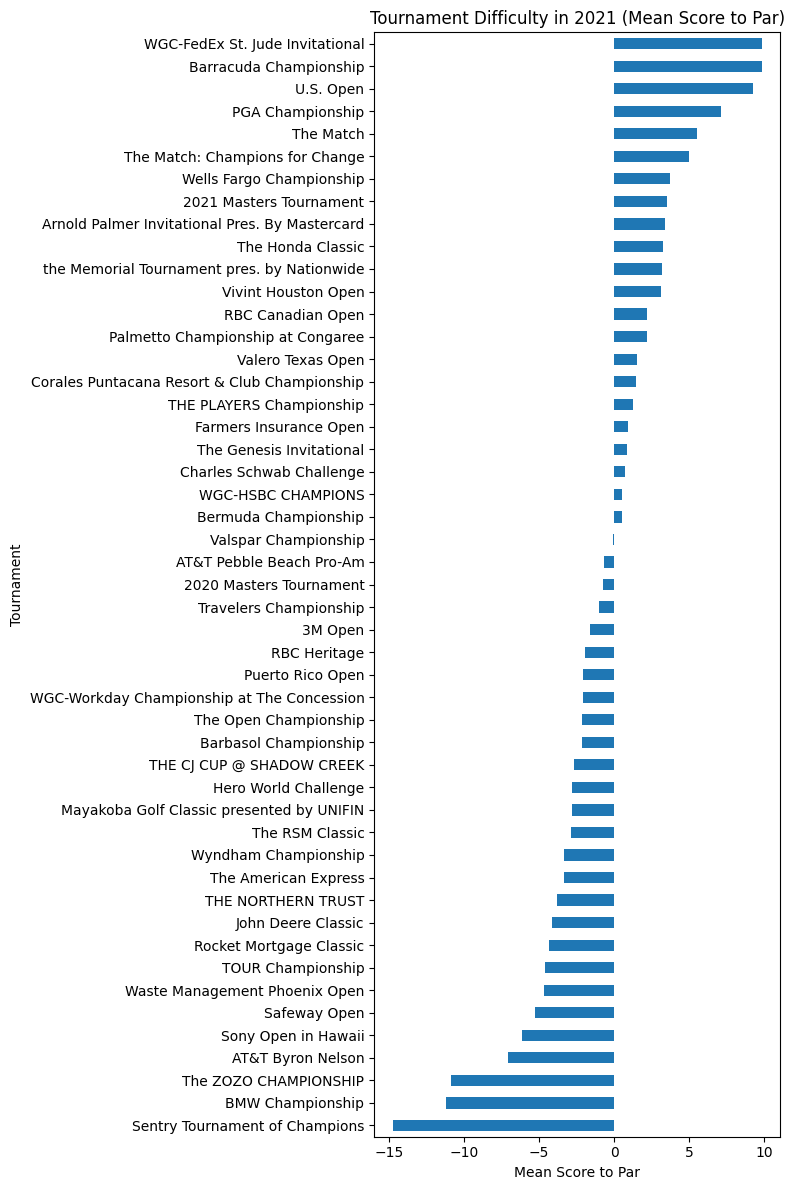

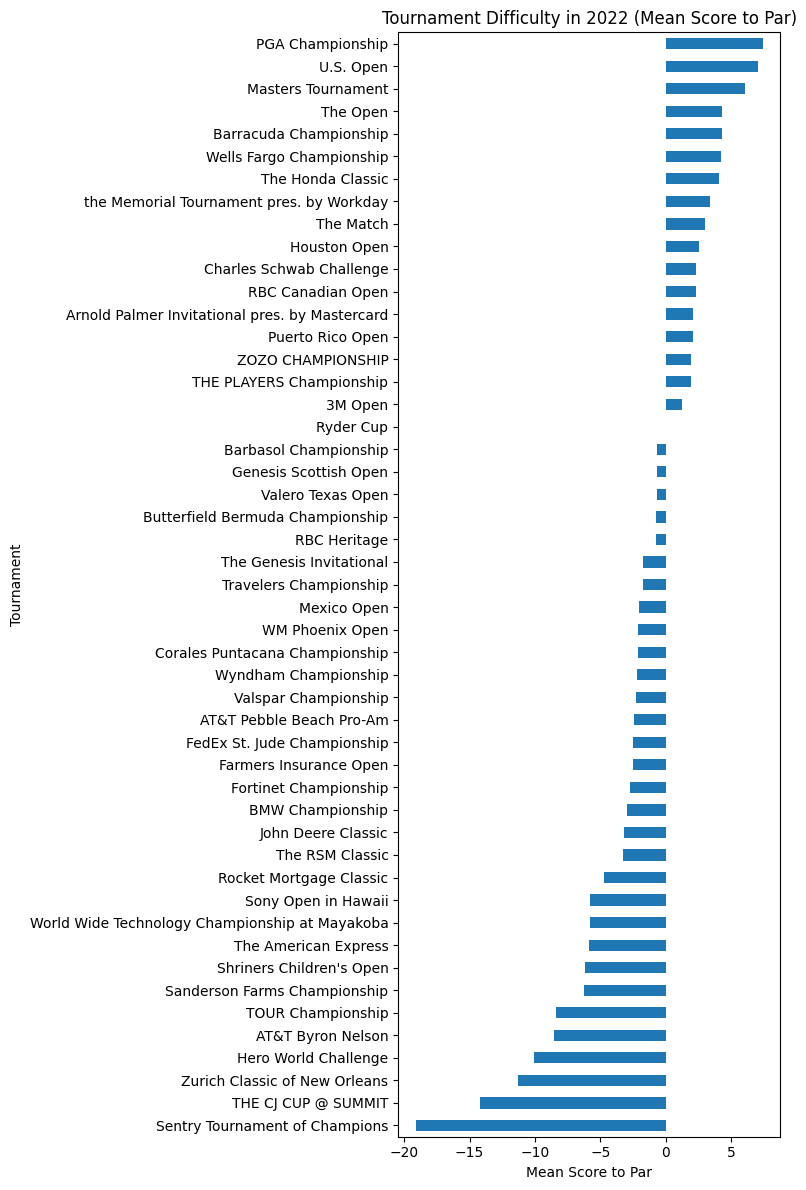

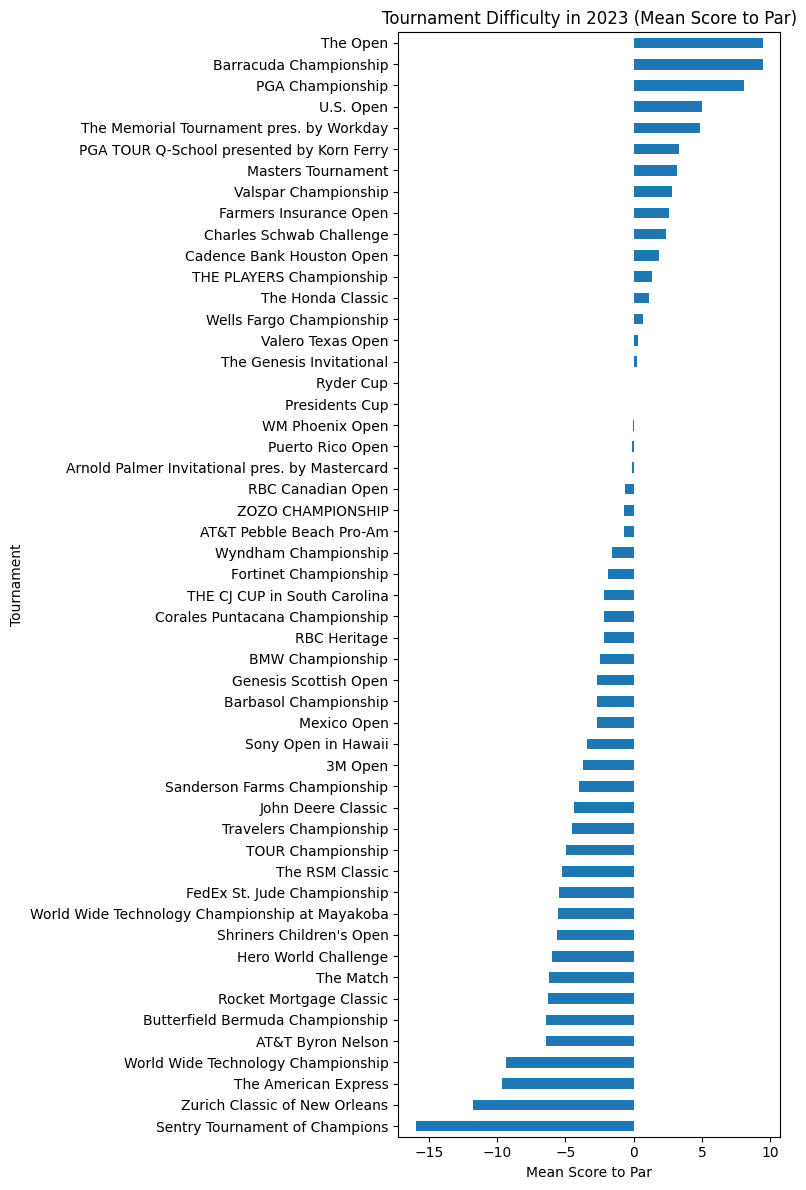

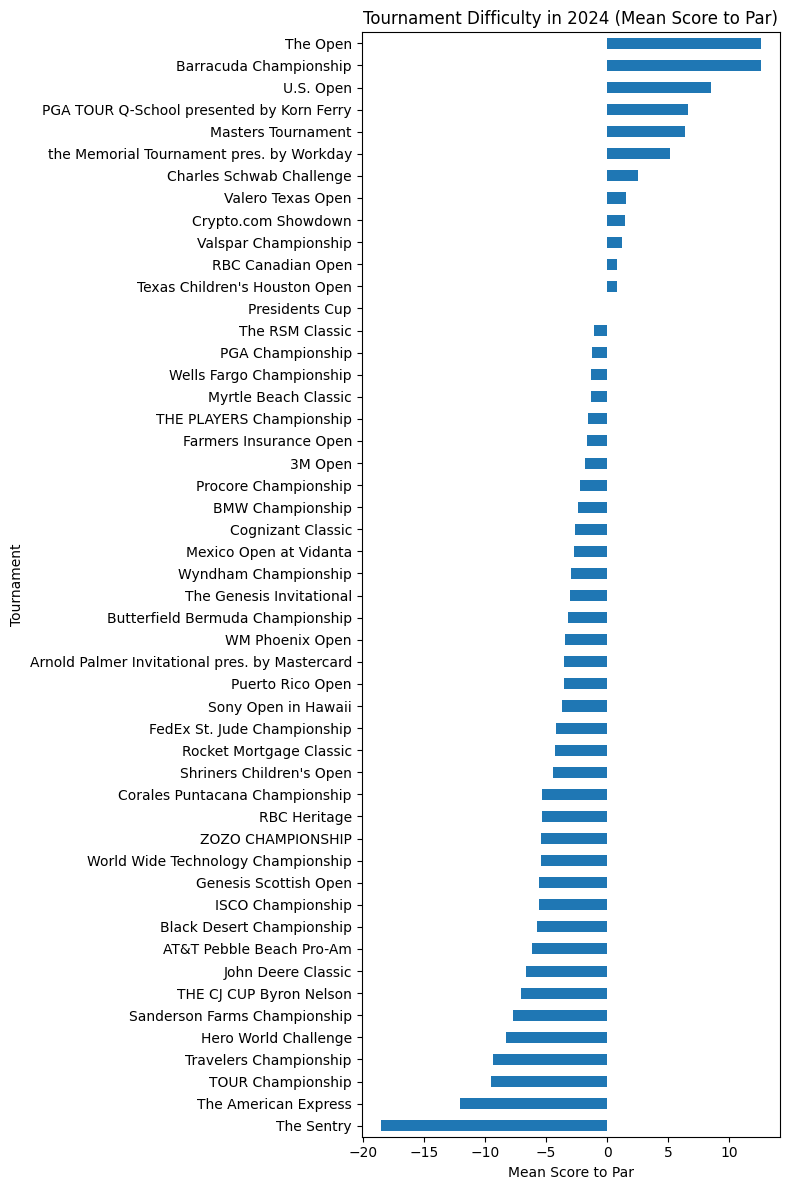

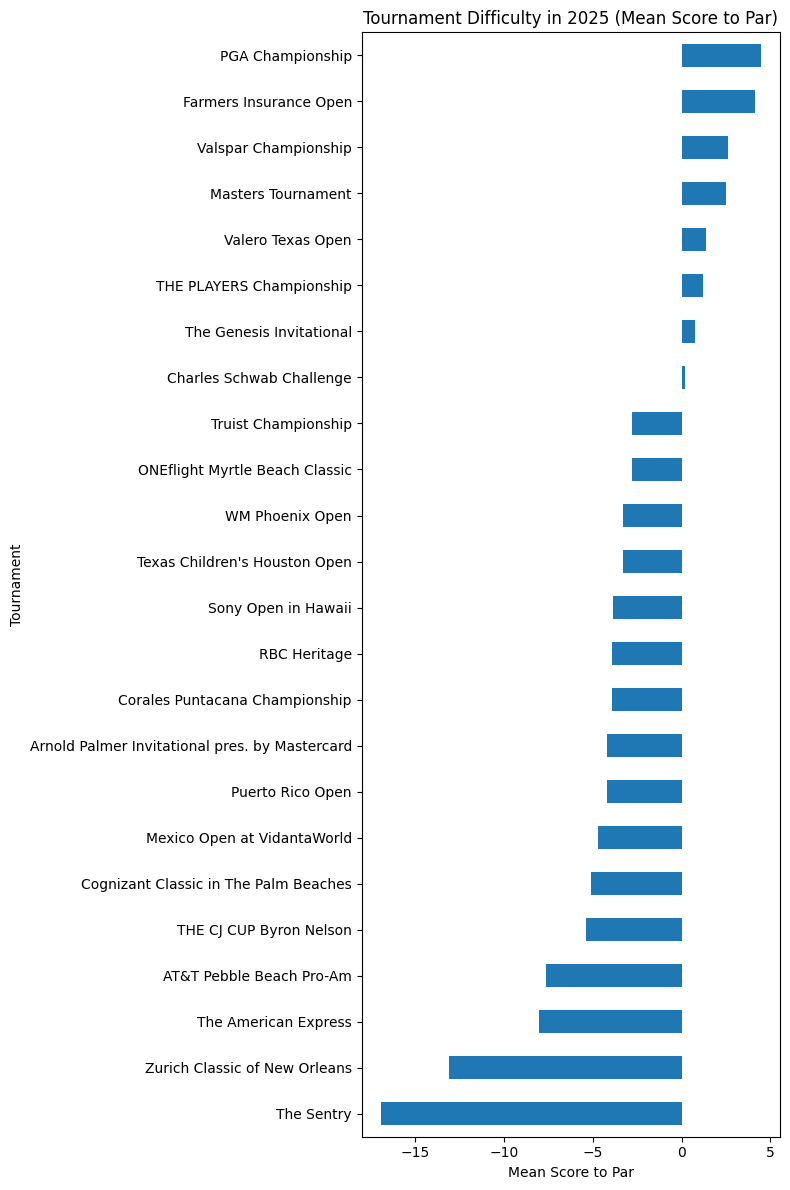

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# 1) Load your data
csv_path = 'data/espn_full_leaderboards_2015_2025.csv'
df = pd.read_csv(csv_path)

# 2) Ensure R1–R4 are numeric, coercing errors to NaN, then fill NaN with 0
for r in ['R1','R2','R3','R4']:
    df[r] = pd.to_numeric(df[r], errors='coerce').fillna(0).astype(int)

# 3) Redefine toPar as the sum of R1–R4
df['toPar'] = df[['R1','R2','R3','R4']].sum(axis=1)

# 1) Boxplot: Distribution of Score to Par by Year
plt.figure(figsize=(12, 6))
df.boxplot(column='toPar', by='year', grid=False)
plt.title('Distribution of Score to Par by Year')
plt.suptitle('')  # remove automatic subtitle
plt.xlabel('Year')
plt.ylabel('Score to Par')
plt.show()

# 2) Boxplot: Round-by-Round Score Distributions
plt.figure(figsize=(8, 6))
df[['R1', 'R2', 'R3', 'R4']].boxplot()
plt.title('Round-by-Round Score Distributions')
plt.xlabel('Round')
plt.ylabel('Par Relative Score')
plt.show()

# 3) Bar Chart: Median Score to Par by Tournament in a Given Year
for year in df['year'].unique():
    sub = df[df['year'] == year]
    mean = sub.groupby('tournamentName')['toPar'].mean().sort_values()

    plt.figure(figsize=(8, 12))
    mean.plot(kind='barh')
    plt.title(f'Tournament Difficulty in {year} (Mean Score to Par)')
    plt.xlabel('Mean Score to Par')
    plt.ylabel('Tournament')
    plt.tight_layout()
    plt.show()
